In [22]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

train_dataset_dir = "D:/DATASET/DATASET/TRAIN"
train_images = []
train_labels = []

extract_label = lambda folder_name: "Organic" if folder_name == 'O' else "Recyclable"

# Iterate through subdirectories (O and R)
for folder_name in os.listdir(train_dataset_dir):
    folder_path = os.path.join(train_dataset_dir, folder_name)

    if os.path.isdir(folder_path):  # Ensure it's a directory
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)

            # Check if the file exists
            if os.path.isfile(file_path):
                # Read the image using OpenCV
                image = cv2.imread(file_path)
                
                if image is not None:
                    # Convert the image to grayscale
                    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    
                    # Equalize the histogram
                    enhanced_image = cv2.equalizeHist(grayscale_image)
                    
                    train_images.append(enhanced_image)
                    train_labels.append(extract_label(folder_name))
                else:
                    print(f"Failed to read image: {file_path}")
            else:
                print(f"File not found: {file_path}")
    else:
        print(f"Not a directory: {folder_path}")

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


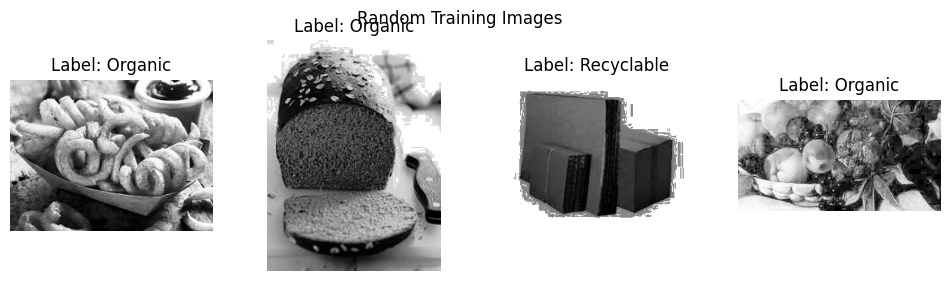

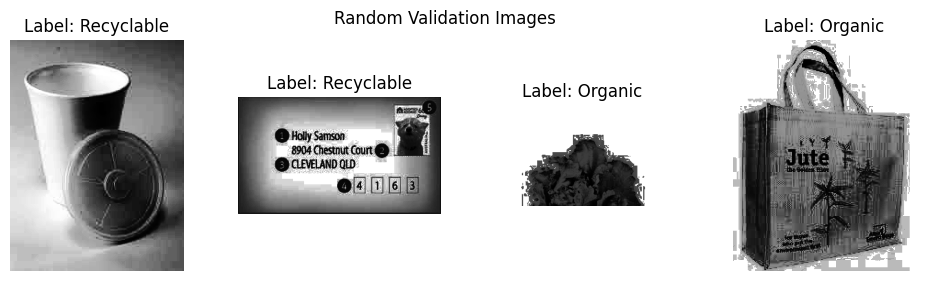

In [23]:
import random
import matplotlib.pyplot as plt

# Randomly select four indices from the training dataset
train_indices = random.sample(range(len(X_train)), 4)

# Randomly select four indices from the validation dataset
val_indices = random.sample(range(len(X_val)), 4)  # Using validation set indices

# Function to display images
def display_images(images, labels, title):
    plt.figure(figsize=(12, 3))
    plt.suptitle(title)
    for i, (image, label) in enumerate(zip(images, labels), 1):
        plt.subplot(1, 4, i)
        plt.imshow(image, cmap='gray')  # Assuming the images are already grayscale
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.show()

# Display four random training images
train_images_to_display = [X_train[i] for i in train_indices]
train_labels_to_display = [y_train[i] for i in train_indices]
display_images(train_images_to_display, train_labels_to_display, "Random Training Images")

# Display four random testing images
val_images_to_display = [X_val[i] for i in val_indices]  # Using validation set images
val_labels_to_display = [y_val[i] for i in val_indices]  # Using validation set labels
display_images(val_images_to_display, val_labels_to_display, "Random Validation Images")


In [24]:
import os
import numpy as np
import cv2

test_dataset_dir = "D:/DATASET/DATASET/TEST"
test_images = []
test_labels = []

extract_label = lambda folder_name: "Organic" if folder_name == 'O' else "Recyclable"

# Iterate through subdirectories (O and R)
for folder_name in os.listdir(test_dataset_dir):
    folder_path = os.path.join(test_dataset_dir, folder_name)

    if os.path.isdir(folder_path):  # Ensure it's a directory
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)

            # Check if the file exists
            if os.path.isfile(file_path):
                # Read the image using OpenCV
                image = cv2.imread(file_path)
                
                if image is not None:
                    # Convert the image to grayscale
                    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    
                    # Equalize the histogram
                    enhanced_image = cv2.equalizeHist(grayscale_image)
                    
                    test_images.append(enhanced_image)
                    test_labels.append(extract_label(folder_name))
                else:
                    print(f"Failed to read image: {file_path}")
            else:
                print(f"File not found: {file_path}")
    else:
        print(f"Not a directory: {folder_path}")
    X_test = test_images
    y_test = test_labels


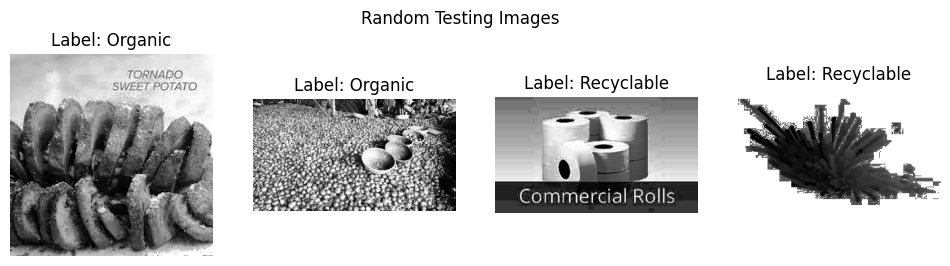

In [25]:
# Randomly select four indices from the testing dataset
test_indices = random.sample(range(len(X_test)), 4)

# Function to display images
def display_images(images, labels, title):
    plt.figure(figsize=(12, 3))
    plt.suptitle(title)
    for i, (image, label) in enumerate(zip(images, labels), 1):
        plt.subplot(1, 4, i)
        plt.imshow(image, cmap='gray')  # Assuming the images are already grayscale
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.show()

# Display four random training images
test_images_to_display = [X_test[i] for i in test_indices]
test_labels_to_display = [y_test[i] for i in test_indices]
display_images(test_images_to_display, test_labels_to_display, "Random Testing Images")


In [26]:
labels = train_labels + test_labels
data = train_images + test_images
print(f'Total Samples (Persons): {len(np.unique(labels))}')
print(f'Total Images and Lables: {len(data)}, {len(labels)}')
print(f'Training Samples: {len(X_train)},{len(y_train)}')
print(f'Validation Samples: {len(X_val)}, {len(y_val)}')
print(f'Testing Samples: {len(X_test)}, {len(y_test)}')

Total Samples (Persons): 2
Total Images and Lables: 25076, 25076
Training Samples: 18050,18050
Validation Samples: 4513, 4513
Testing Samples: 2513, 2513


Validation Metrics:
Accuracy: 0.72
Precision: 0.72
Recall: 0.72
F1 Score: 0.72

Test Metrics:
Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1 Score: 0.76


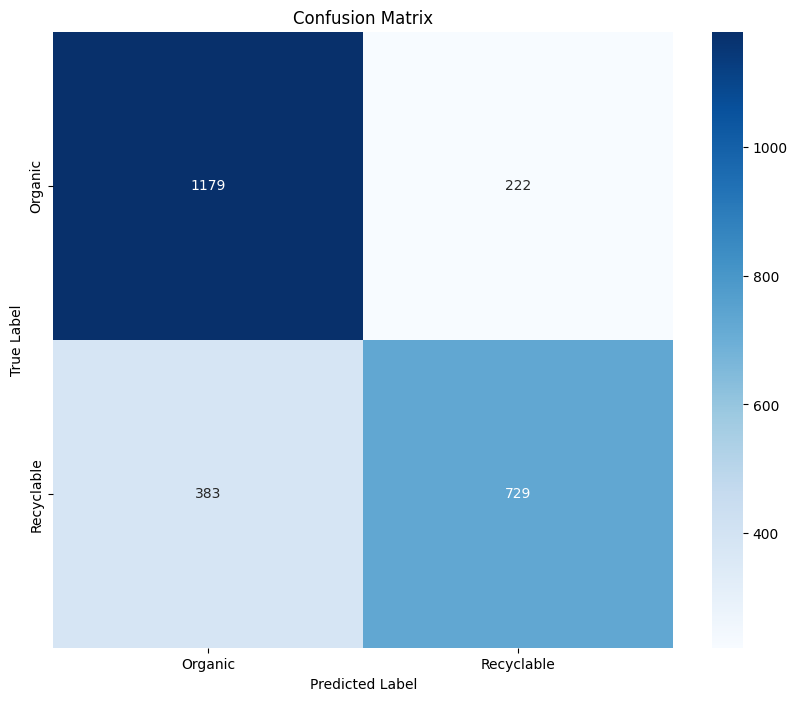

In [45]:
from skimage.transform import resize
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from skimage.feature import hog
import seaborn as sns
from PIL import Image
# Extract HOG features
def extract_hog_features(images, target_size=(128, 128)):
    hog_features = []
    for image in images:
        # Resize the image to a fixed size
        resized_image = resize(image, target_size, anti_aliasing=True)
        # Compute HOG features directly for grayscale images
        features = hog(resized_image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), block_norm='L2-Hys', visualize=False, feature_vector=True)
        hog_features.append(features)
    return np.vstack(hog_features)

X_train_hog = extract_hog_features(X_train)
X_val_hog = extract_hog_features(X_val)
X_test_hog = extract_hog_features(X_test)

# Train an SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_hog, y_train)



# Predictions on the test set
y_pred = svm_model.predict(X_val_hog)
y_pred2 = svm_model.predict(X_test_hog)

# Evaluate the model for validation
conf_matrix = confusion_matrix(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Display metrics
print(f"Validation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Evaluate the model for test
conf_matrix2 = confusion_matrix(y_test, y_pred2)
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2, average='weighted')
recall2 = recall_score(y_test, y_pred2, average='weighted')
f12 = f1_score(y_test, y_pred2, average='weighted')

# Display metrics
print("\nTest Metrics:")
print(f"Accuracy: {accuracy2:.2f}")
print(f"Precision: {precision2:.2f}")
print(f"Recall: {recall2:.2f}")
print(f"F1 Score: {f12:.2f}")

# Display confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [46]:
import pickle  # Import pickle for model saving
model_filename = 'svm_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(svm_model, model_file)
print(f"Model saved as {model_filename}")

Model saved as svm_model.pkl


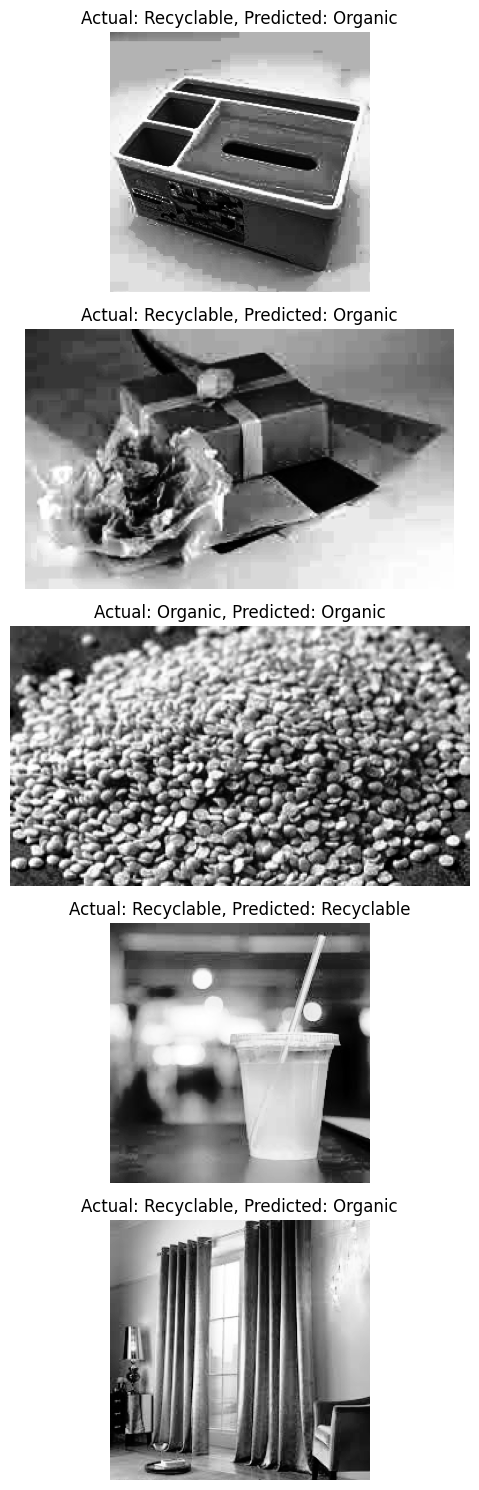

In [47]:
# Function to display sample predictions
def display_sample_predictions(images, actual_labels, predicted_labels, sample_size=5):
    plt.figure(figsize=(15, 3 * sample_size))
    for i in range(sample_size):
        plt.subplot(sample_size, 2, 2 * i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Actual: {actual_labels[i]}, Predicted: {predicted_labels[i]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display a sample of predictions
sample_size = 5
sample_indices = np.random.choice(len(X_test_hog), sample_size, replace=False)

sample_images = [X_test[i] for i in sample_indices]
sample_actual_labels = [y_test[i] for i in sample_indices]
sample_predicted_labels = [y_pred[i] for i in sample_indices]

# Display the sample predictions
display_sample_predictions(sample_images, sample_actual_labels, sample_predicted_labels)
